En el ejercicio de hoy tendremos que contestar a las siguientes preguntas:

📌 Nota Como siempre, después de cada gráfica incluid una pequeña explicación de lo que nos está mostrando la gráfica.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

import warnings
warnings.filterwarnings('ignore')

Estableced el tamaño de las figuras al inicio de vuestro jupyter para que todas tengan las mismas dimensiones.

In [2]:
plt.rcParams["figure.figsize"] = (15,10)

In [3]:
#os.chdir("pairs_modulo_2/promo_d_da_modulo2_sprint2_Silvia_Paula/")

In [4]:
df_tickets = pd.read_csv("datos/historico_tickets_limpio_pandas.csv", index_col= 0)

In [5]:
df_tickets.head(2)

,id_ticket,fecha,id_empleado,id_agente,categoría,tipo,severidad,prioridad,días_resolución,satisfacción,semestre,año,mes
0,GDDENR-5042564453,2016-07-13,1735,4,Acceso/Login,Problema,0 - Sin Clasificar,0 - Sin Asignar,0,5,2º semestre,2016,Julio
1,GDDENR-8042508060,2016-05-18,1566,10,Acceso/Login,Problema,0 - Sin Clasificar,0 - Sin Asignar,0,5,1 semestre,2016,Mayo


Manos a la obra con los plots, estos irán muy dirigidos hacia las preguntas que queremos contestar, para hacer una primera aproximación a nuestras hipótesis:

En la primera gráfica tendremos que contestar la siguiente pregunta: 

¿Son los tickets con mayor severidad y prioridad los que se resuelven antes?. Para eso tendréis que:

- Crear un subplot con dos gráficas.
- En la primera gráfica tendréis que mostrar la relación que existe entre la severidad y el tiempo de resolución. ¿Son los tickets que tienen una severidad más alta los que más tardan en resolverse?


In [6]:
list(np.sort(df_tickets["severidad"].unique()))

['0 - Sin Clasificar', '1 - Menor', '2 - Normal', '3 - Mayor', '4 - Crítico']

([<matplotlib.axis.XTick at 0x7f5b7ab526d0>,
 [Text(0, 0, '0 - Sin Clasificar'),
  Text(1, 0, '1 - Menor'),
  Text(2, 0, '2 - Normal'),
  Text(3, 0, '3 - Mayor'),
  Text(4, 0, '4 - Crítico')])

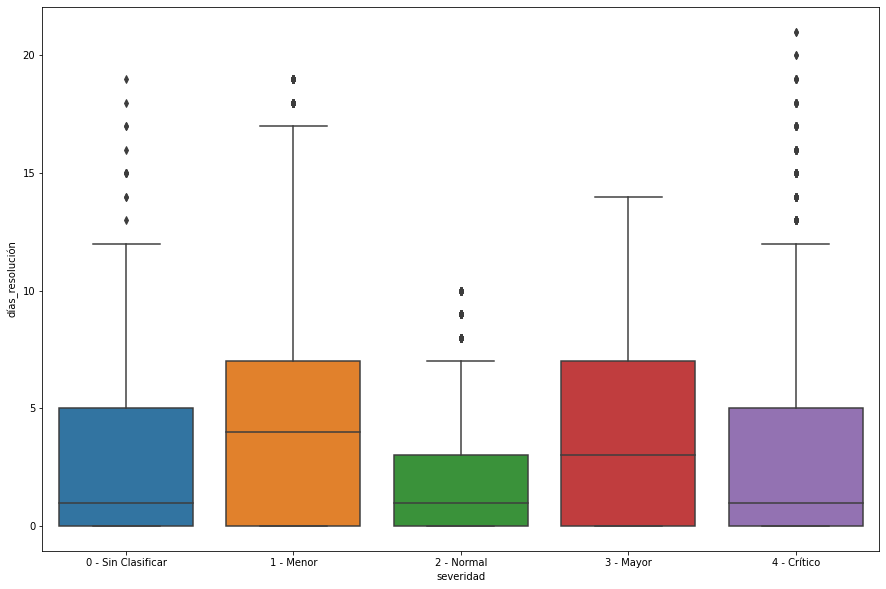

In [7]:
sns.boxplot(x = "severidad", y = "días_resolución", data = df_tickets)
plt.xticks(ticks = [0,1,2,3,4], labels = list(np.sort(df_tickets["severidad"].unique())))


- En la segunda gráfica tendréis que mostrar la relación que existe entre la prioridad y el tiempo de resolución. ¿Son los tickets que tienen una prioridad más alta los que más tardan en resolverse?

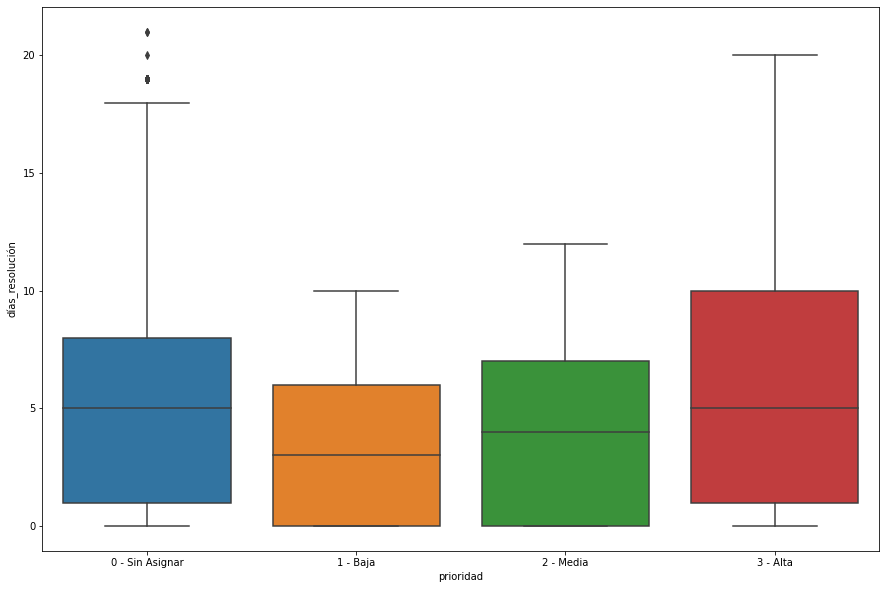

In [8]:
sns.boxplot(x = "prioridad", y = "días_resolución", data = df_tickets)
plt.xticks(ticks = [0,1,2,3], labels = list(np.sort(df_tickets["prioridad"].unique())));

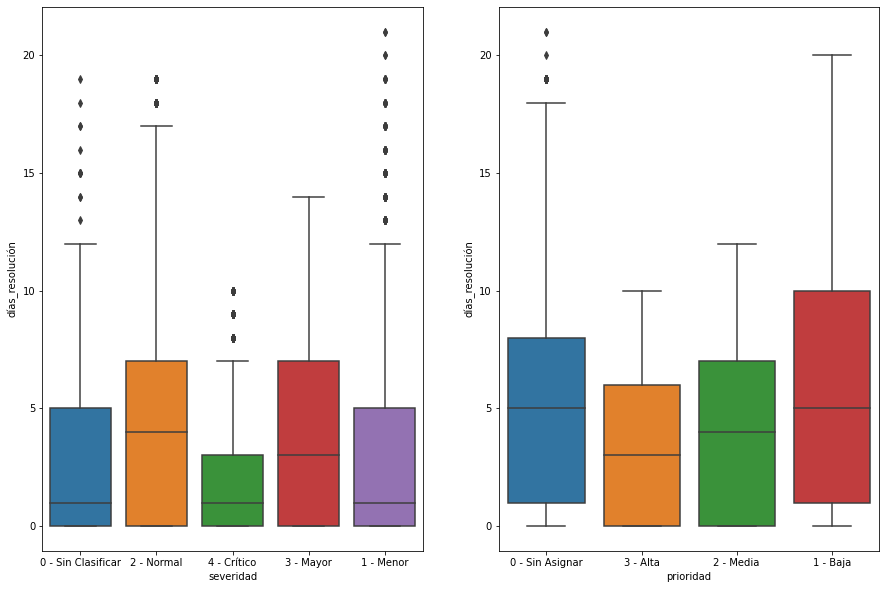

In [9]:
fig, axes = plt.subplots(1,2)
sns.boxplot(x = "severidad", y = "días_resolución", data = df_tickets, ax= axes[0])
axes[0].set_xticks(ticks = [0,1,2,3,4])
axes[0].set_xticklabels = list(np.sort(df_tickets["severidad"].unique()))
sns.boxplot(x = "prioridad", y = "días_resolución", data = df_tickets, ax= axes[1])
axes[1].set_xticks(ticks = [0,1,2,3]) 
axes[1].set_xticklabels = list(np.sort(df_tickets["prioridad"].unique()))

En la segunda gráfica contestaremos a la siguiente pregunta: 

¿Están los clientes con problemas de acceso y login más contentos que los que tienen problemas de software?. Para eso tendréis que:

- Crear otro dataframe donde tengáis solo los datos para los datos para los problemas de tipo "Acceso/Login" o "Software".
- Crear una gráfica donde podamos ver la satisfacción de los clientes en función de los problemas filtrados en el paso anterior.

In [10]:
df_tickets.head(1)

,id_ticket,fecha,id_empleado,id_agente,categoría,tipo,severidad,prioridad,días_resolución,satisfacción,semestre,año,mes
0,GDDENR-5042564453,2016-07-13,1735,4,Acceso/Login,Problema,0 - Sin Clasificar,0 - Sin Asignar,0,5,2º semestre,2016,Julio


In [11]:
df_acceso = df_tickets[df_tickets["categoría"].isin(["Acceso/Login", "Software"])]
df_acceso.head()

,id_ticket,fecha,id_empleado,id_agente,categoría,tipo,severidad,prioridad,días_resolución,satisfacción,semestre,año,mes
0,GDDENR-5042564453,2016-07-13,1735,4,Acceso/Login,Problema,0 - Sin Clasificar,0 - Sin Asignar,0,5,2º semestre,2016,Julio
1,GDDENR-8042508060,2016-05-18,1566,10,Acceso/Login,Problema,0 - Sin Clasificar,0 - Sin Asignar,0,5,1 semestre,2016,Mayo
4,GDLEER-0042524120,2016-06-03,1842,31,Software,Problema,2 - Normal,0 - Sin Asignar,0,5,1 semestre,2016,Junio
5,GDLEER-0142608095,2016-08-26,59,20,Software,Problema,2 - Normal,0 - Sin Asignar,1,1,2º semestre,2016,Agosto
6,GDLEER-0242564650,2016-07-13,1175,36,Software,Problema,2 - Normal,0 - Sin Asignar,2,1,2º semestre,2016,Julio


In [12]:
sns.boxplot(x = "", y = "", data = df_tickets)
plt.xticks(ticks = [0,1,2,3], labels = list(np.sort(df_tickets[""].unique())))

ValueError: Could not interpret input ''

En la tercera gráfica contestaremos a las siguientes preguntas 

¿Cuáles son los empleados que más tickets atienden? 

¿Son los empleados que atienden más tickets los que tardan más en solucionar los problemas de los clientes? 

¿Y la media de la satisfacción de los clientes es menor en aquellos empleados que atienden más solicitudes?. 

Para contestar a esto haremos 3 gráficas independientes:

En la primera gráfica deberemos, 
- Cuáles son los empleados que más tickets atienden?:
- Sacar el número de tickets por empleado. Pista 💡 Para esto tendremos que usar un groupby.
- Visualizar el resultado del groupby anterior con la gráfica que sea más adecuada.

In [14]:
df_empleados = df_tickets.groupby("id_empleado")["id_ticket"].count().reset_index().sort_values(by = "id_ticket", ascending=False)
df_empleados

,id_empleado,id_ticket
753,754,73
284,285,73
635,636,71
522,523,69
78,79,69
...,...,...
1617,1618,31
71,72,31
1194,1195,29
98,99,27


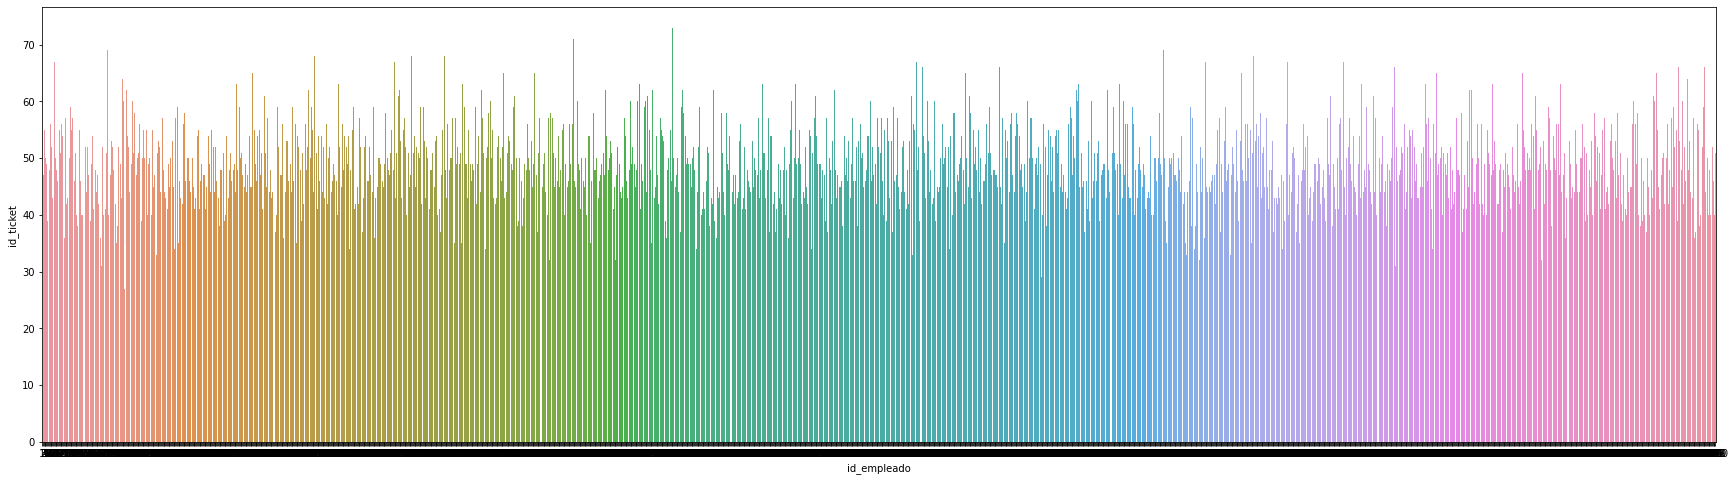

In [15]:
plt.figure(figsize=(30, 8))
sns.barplot(x ="id_empleado", y = "id_ticket", data= df_empleados);


En la segunda gráfica, ¿Son los empleados que atienden más tickets los que tardan más en solucionar los problemas de los clientes?
- Deberéis crear una lista donde tengamos los "id's" de los 10 empleados que resuelvan más cantidad tickets y con los 10 empleados que resuelvan menos cantidad de tickets.
- Usando la lista generada en el ejercicio anterior filtrad el dataframe para quedaros solo con los 10 seleccionados en el ejercicio anterior.
- Una vez tengáis el dataframe filtrado, cread una gráfica donde veamos el tiempo de resolución de solicitudes para cada empleado

In [16]:
df_mas_tickets= df_empleados.head(10)
df_menos_tickets= df_empleados.tail(10) 	

lista_emp_mas_tickets = list(df_mas_tickets["id_empleado"])
lista_emp_menos_tickets = list(df_menos_tickets["id_empleado"])

In [17]:
df_tiempos = df_tickets.groupby("id_empleado")["días_resolución"].mean().reset_index().sort_values(by = "días_resolución", ascending=False)
df_tiempos_mas_tick = df_tiempos[df_tiempos["id_empleado"].isin(lista_emp_mas_tickets)].sort_values(by= "días_resolución", ascending= False)
df_tiempos_menos_tick = df_tiempos[df_tiempos["id_empleado"].isin(lista_emp_menos_tickets)].sort_values(by= "días_resolución", ascending= False)


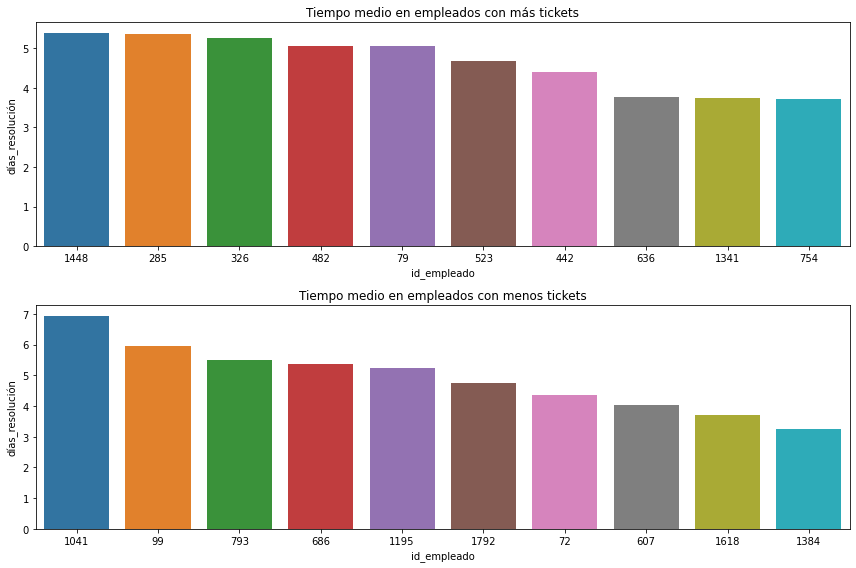

In [18]:
fig, axes = plt.subplots(2,1, figsize = (12, 8))
sns.barplot(x ="id_empleado", y = "días_resolución", data= df_tiempos_mas_tick, 
            order = df_tiempos_mas_tick.sort_values('días_resolución', ascending = False)['id_empleado'], ax = axes[0])
sns.barplot(x ="id_empleado", y = "días_resolución", data= df_tiempos_menos_tick, 
            order = df_tiempos_menos_tick['id_empleado'], ax = axes[1])
axes[0].set_title("Tiempo medio en empleados con más tickets")
axes[1].set_title("Tiempo medio en empleados con menos tickets")
fig.tight_layout();

En la tercera gráfica, ¿Y la media de la satisfacción de los clientes es menor en aquellos empleados que atienden más solicitudes?:
📌 Usaremos los mismos datos que en la pregunta anterior, el dataframe de los 10 empleados más productivos y menos productivos.
- Cread una gráfica donde veamos la satisfacción de los clientes para cada empleado.

In [19]:
df_sat = df_tickets.groupby("id_empleado")["satisfacción"].mean().reset_index().sort_values(by = "satisfacción", ascending=False)
df_sat_mas_tick = df_sat[df_sat["id_empleado"].isin(lista_emp_mas_tickets)].sort_values(by= "satisfacción", ascending= False)
df_sat_menos_tick = df_sat[df_sat["id_empleado"].isin(lista_emp_menos_tickets)].sort_values(by= "satisfacción", ascending= False)


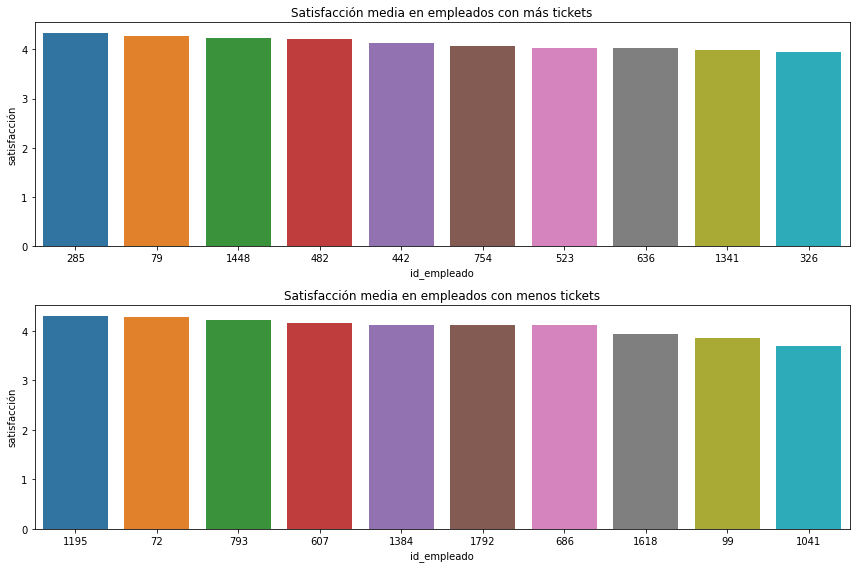

In [21]:
fig, axes = plt.subplots(2,1, figsize = (12, 8))
sns.barplot(x ="id_empleado", y = "satisfacción", data= df_sat_mas_tick, 
            order = df_sat_mas_tick.sort_values('satisfacción', ascending = False)['id_empleado'], ax = axes[0])
sns.barplot(x ="id_empleado", y = "satisfacción", data= df_sat_menos_tick, 
            order = df_sat_menos_tick['id_empleado'], ax = axes[1])
axes[0].set_title("Satisfacción media en empleados con más tickets")
axes[1].set_title("Satisfacción media en empleados con menos tickets")
fig.tight_layout();